# Dimensionality Reduction Using a Principal Component Analysis

In order to analyze the DrugMatrix data, we will first explore it using dimensionality reduction and cluster analysis. This will allow us to represent the data in a two-dimensional space and find hidden relationships in the data.

### Principal Component Analysis

PCA reduces dimensionality by finding principal components. These are directions  of maximum variation in a dataset. This will allow us to reduce a dataset's original features to a set of new ones based on the principal components. In this way, we end up with the least amount of features that keep the maximum amount of variation about how the data is distributed.

## Preparing data (DM_heart1/DM_heart2)

Here we import the DrugMatrix (Thigh) CSV file of drugs and genes from the google drive folder as a dataframe entitled: 'DM_heart1'

We will use the thigh df to create and explore 2 separate dataframes: 

### DM_heart1) Raw data including all (31,040) genes and multiple drug dosage levels
### DM_heart2) Same as one except using only the annotated (23,748) genes in DrugMatrix's database (non-'NaN')


In [1]:
import pandas as pd

#Original thigh df
DM_heart = pd.read_table('C:\Users\Troy\Desktop\Heart.txt', sep='\t')

#DM_heart1
DM_heart1 = DM_heart
DM_heart1.columns.names = ['Drugs']
DM_heart1 = DM_heart1.set_index('Gene')
del DM_heart1['Unnamed: 0']
del DM_heart1['Unnamed: 209']
DM_heart1.head()

Drugs,TACROLIMUS,AMILORIDE,ACROLEIN,METOPROLOL,PREDNISONE,VALSARTAN,CHLOROBENZENE,CISAPRIDE,VALPROIC ACID,DOXORUBICIN,...,VALSARTAN.3,RISPERIDONE.1,PROCAINAMIDE,ANGIOTENSIN II HUMAN.2,ANGIOTENSIN II HUMAN.3,LORATADINE.1,PAROXETINE.1,CORTISONE,IFOSFAMIDE.1,ANGIOTENSIN II HUMAN.4
Gene,,,,,,,,,,,,,,,,,,,,,
Cyp1a1,-0.444,0.079,-0.230,0.905,-0.236,-0.232,0.741,0.646,0.825,0.196,...,0.259,-0.397,-0.032,-0.514,-0.304,0.296,0.732,-0.303,-0.612,-0.004
NaN,0.369,-0.060,0.164,0.085,0.168,0.098,0.073,0.119,-0.005,0.082,...,0.111,-0.093,-0.052,0.032,0.229,0.104,0.009,0.025,0.119,0.235
Amy2a3,0.325,0.119,-0.007,-0.243,-0.174,-0.241,0.423,-0.054,-0.219,-0.177,...,-0.709,0.390,0.270,0.007,-0.366,-0.363,-0.216,0.254,0.255,0.041
NaN,0.257,0.026,-0.046,0.081,0.075,0.060,0.250,0.078,-0.005,0.155,...,0.291,0.023,-0.068,-0.064,0.049,0.105,-0.122,-0.022,-0.027,-0.067
Gtpbp6,0.004,0.003,-0.356,-0.079,-0.015,0.035,-0.067,-0.051,0.051,0.164,...,-0.024,0.071,-0.026,-0.058,0.017,0.114,0.054,0.020,0.006,0.041


In [28]:
print len(DM_heart1.index) -2, "Genes" 
print len(DM_heart1.columns) -1, "Drugs"

31040 Genes
207 Drugs


In [3]:
#DM_heart2
DM_heart2 = DM_heart.dropna(subset=['Gene'])
del DM_heart2['Unnamed: 0']
del DM_heart2['Unnamed: 209']
DM_heart2.columns.names = ['Drugs']
DM_heart2 = DM_heart2.set_index('Gene')
DM_heart2.head()

Drugs,TACROLIMUS,AMILORIDE,ACROLEIN,METOPROLOL,PREDNISONE,VALSARTAN,CHLOROBENZENE,CISAPRIDE,VALPROIC ACID,DOXORUBICIN,...,VALSARTAN.3,RISPERIDONE.1,PROCAINAMIDE,ANGIOTENSIN II HUMAN.2,ANGIOTENSIN II HUMAN.3,LORATADINE.1,PAROXETINE.1,CORTISONE,IFOSFAMIDE.1,ANGIOTENSIN II HUMAN.4
Gene,,,,,,,,,,,,,,,,,,,,,
Cyp1a1,-0.444,0.079,-0.230,0.905,-0.236,-0.232,0.741,0.646,0.825,0.196,...,0.259,-0.397,-0.032,-0.514,-0.304,0.296,0.732,-0.303,-0.612,-0.004
Amy2a3,0.325,0.119,-0.007,-0.243,-0.174,-0.241,0.423,-0.054,-0.219,-0.177,...,-0.709,0.390,0.270,0.007,-0.366,-0.363,-0.216,0.254,0.255,0.041
Gtpbp6,0.004,0.003,-0.356,-0.079,-0.015,0.035,-0.067,-0.051,0.051,0.164,...,-0.024,0.071,-0.026,-0.058,0.017,0.114,0.054,0.020,0.006,0.041
Btrc,-0.073,0.105,-0.089,0.025,-0.115,-0.103,0.047,0.044,-0.033,-0.136,...,-0.102,0.094,0.022,-0.047,0.088,-0.049,0.106,-0.072,0.044,0.013
Pde12,-0.056,0.033,0.143,-0.002,-0.008,-0.077,-0.282,-0.059,-0.180,0.352,...,-0.116,0.190,0.105,-0.040,-0.123,0.016,-0.067,0.242,0.027,-0.029


In [29]:
print len(DM_heart2.index) -2, "Genes" 
print len(DM_heart2.columns) -1, "Drugs"

23748 Genes
207 Drugs


We specified index_col to be 0 in order to make the drug names the row labels. We used the '\t' separator because our csv is actually tab-delimited (not comma). The head() function shows the first 5 lines (by defalult) to ensure our output is correct.

## Dimensionality Reduction(DM_heart1)

Ideally at this point we want to represent each drug in a two dimensional space. This dataset has each sample as a drug defined by 207 different variables - each corresponding to a distinct drug (or drug dosage).  

Python's Sci-kit machine learning library comes with PCA implementation

In [5]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=2)
pca1.fit(DM_heart1)

DM_2d1 = pca1.transform(DM_heart1)

DM_heart1_2d = pd.DataFrame(DM_2d1)
DM_heart1_2d.index = DM_heart1.index
DM_heart1_2d.columns = ['PC1','PC2']
DM_heart1_2d.head()

,PC1,PC2
Gene,,
Cyp1a1,-2.241780,1.798667
NaN,-0.312426,0.737883
Amy2a3,-1.328281,-0.544834
NaN,-0.293348,0.815151
Gtpbp6,0.214674,0.551326


Here we transformed our data into a lower representation and put it into a new dataframe: 'DM_heart1_2d'

We also can check the explained variance ratio as shown below.

In [6]:
print(pca1.explained_variance_ratio_)

[ 0.0764123   0.04591153]


## Dimensionality Reduction (DM_heart2)

In [7]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
pca2.fit(DM_heart2)

DM_2d2 = pca2.transform(DM_heart2)

DM_heart2_2d = pd.DataFrame(DM_2d2)
DM_heart2_2d.index = DM_heart2.index
DM_heart2_2d.columns = ['PC1','PC2']
DM_heart2_2d.head()

,PC1,PC2
Gene,,
Cyp1a1,2.490833,-1.546235
Amy2a3,1.258695,0.626813
Gtpbp6,-0.097533,-0.571419
Btrc,0.041549,-0.011056
Pde12,-0.059605,0.369462


In [8]:
print(pca2.explained_variance_ratio_)

[ 0.08693421  0.04967538]


## Plotting the data (DM_heart1)

Here all we have to do is to call plot on the dataframe. We can add annotation loops that tag every point with it's drug name.

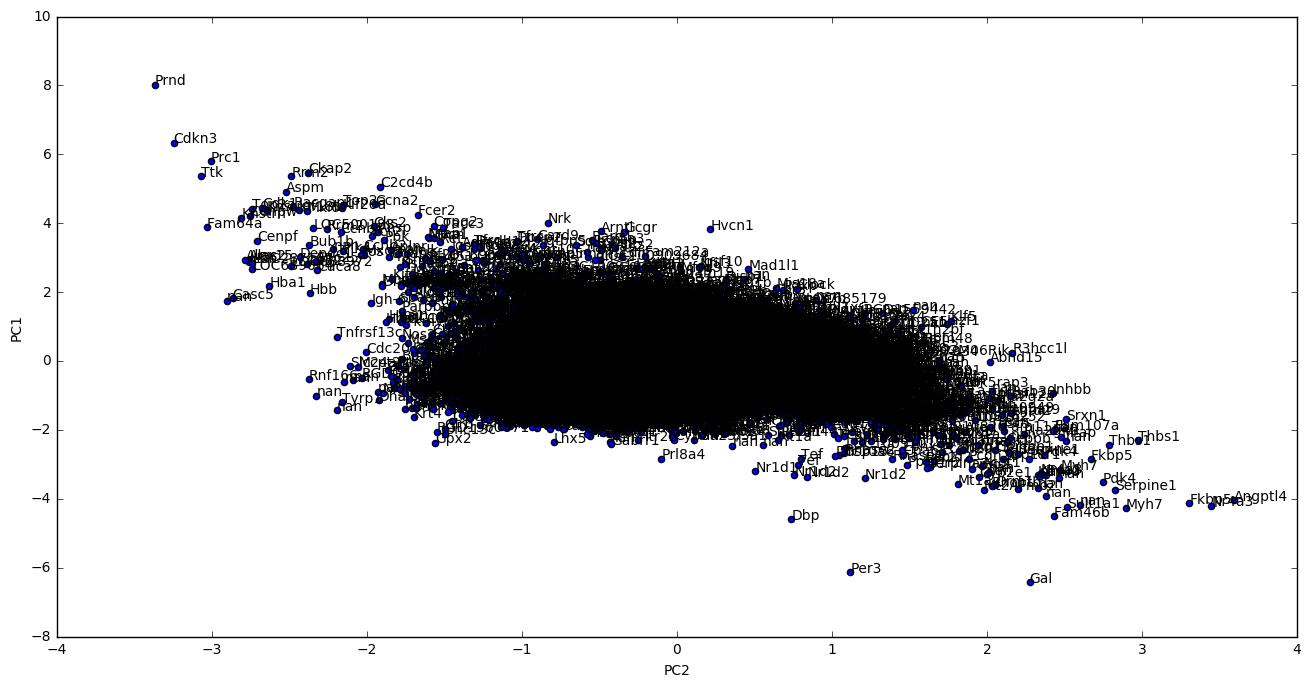

In [9]:
%matplotlib inline

ax = DM_heart1_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, Drug in enumerate(DM_heart1.index):
    ax.annotate(Drug, (DM_heart1_2d.iloc[i].PC2, DM_heart1_2d.iloc[i].PC1))

Additionally we can create a bubble chart to visualize the mean value for all the side effects of a particular drug corresponding to point size. First we'll add a new column containing the scaled mean per drug across all the side effects.

In [10]:
from sklearn.preprocessing import normalize

DM_heart1_2d['Drug_mean'] = pd.Series(DM_heart1.mean(axis=1), index=DM_heart1_2d.index)
Drug_mean_max = DM_heart1_2d['Drug_mean'].max()
Drug_mean_min = DM_heart1_2d['Drug_mean'].min()
Drug_mean_scaled = (DM_heart1_2d.Drug_mean-Drug_mean_min) / Drug_mean_max
DM_heart1_2d['Drug_mean_scaled'] = pd.Series(
    Drug_mean_scaled, 
    index=DM_heart1_2d.index)
DM_heart1_2d.head()

,PC1,PC2,Drug_mean,Drug_mean_scaled
Gene,,,,
Cyp1a1,-2.241780,1.798667,0.083587,1.080141
NaN,-0.312426,0.737883,0.045981,1.003404
Amy2a3,-1.328281,-0.544834,0.070356,1.053143
NaN,-0.293348,0.815151,0.014788,0.939755
Gtpbp6,0.214674,0.551326,-0.011207,0.886710


Now we can plot using variable size, omitting Drug name.

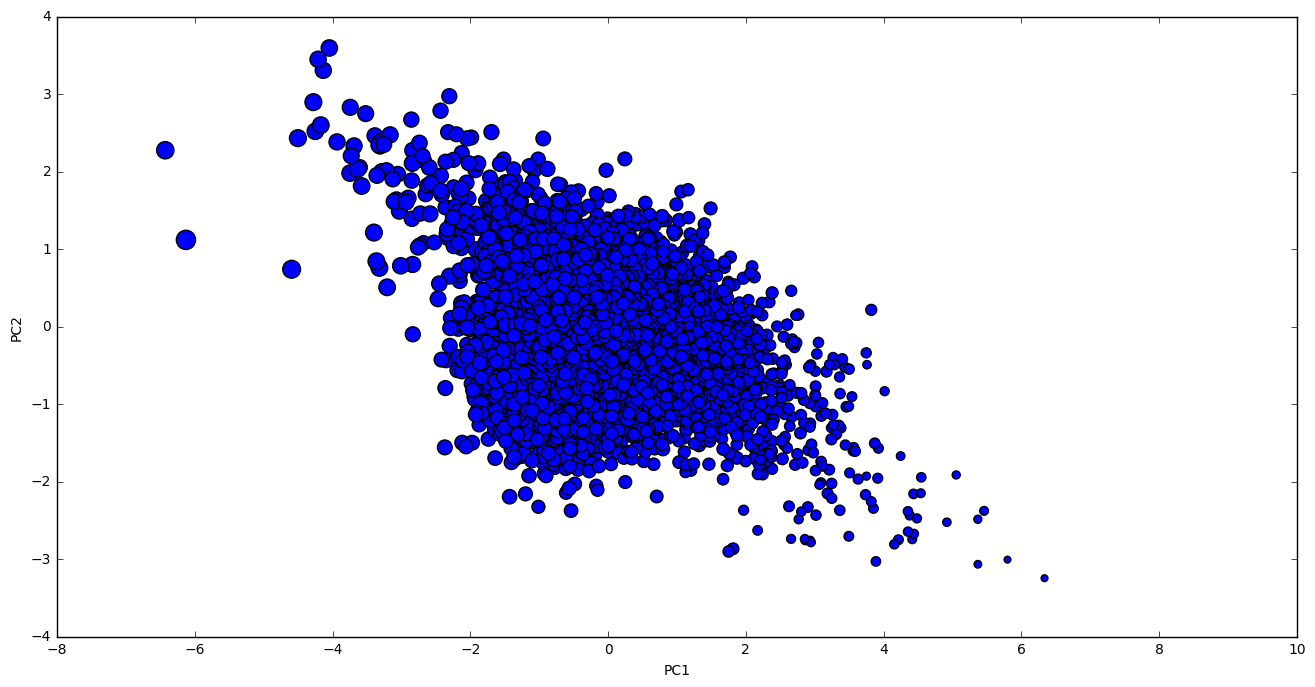

In [11]:
DM_heart1_2d.plot(kind='scatter', x='PC1', y='PC2', s=DM_heart1_2d['Drug_mean_scaled']*100, figsize=(16,8))

We can also do the same with the sum as opposed to the mean to compare.

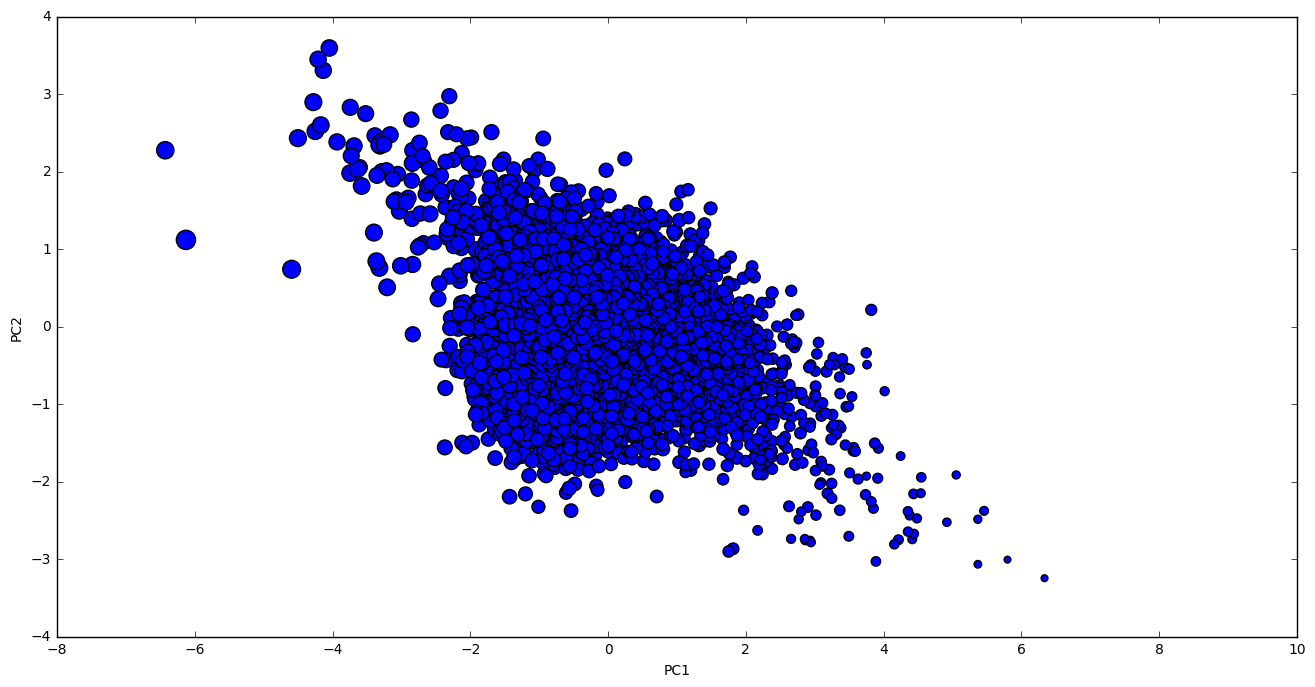

In [12]:
from sklearn.preprocessing import normalize

DM_heart1_2d['Drug_sum'] = pd.Series(DM_heart1.sum(axis=1), index=DM_heart1_2d.index)
Drug_sum_max = DM_heart1_2d['Drug_sum'].max()
Drug_sum_min = DM_heart1_2d['Drug_sum'].min()
Drug_sum_scaled = (DM_heart1_2d.Drug_sum-Drug_sum_min) / Drug_sum_max
DM_heart1_2d['Drug_sum_scaled'] = pd.Series(
    Drug_sum_scaled, 
    index=DM_heart1_2d.index)
DM_heart1_2d.head()
DM_heart1_2d.plot(kind='scatter', x='PC1', y='PC2', s=DM_heart1_2d['Drug_sum_scaled']*100, figsize=(16,8))

From this preliminary data, we can see that there is not much variation overall, but most of it is along the x-axis, which corresponds to our first principal component. Unfortunately, with 207 features (drugs) within the data of 31,040 samples (genes), this first principal component only comprises ~23% of the variance. Combined with the second principal component (~10%) we still only account for about ~33% of the variance using these two components. So let's look at a few more components and see if we can capture a majority of the variance:

In [27]:
pca1 = PCA(n_components=4)
pca1.fit(DM_heart1)
print(pca1.explained_variance_ratio_)

[ 0.0764123   0.04591153  0.03613704  0.02798393]


At four components, we capture ~46% of the variance...

In [14]:
pca1 = PCA(n_components=8)
pca1.fit(DM_heart1)
print(pca1.explained_variance_ratio_)

[ 0.0764123   0.04591153  0.03613704  0.02798393  0.02744175  0.02108941
  0.02058634  0.01762824]


...And at 8 components we capture ~59% of the variance. So in this case, because there is not much variability within the data, we would be better served to use more principal components to accurately reduce the dimensionality of this dataset from 207 to 8. Alternatively, we can update the dataset with more data  or take out multiple drug dosages and then be able to capture more variability with less dimensions.

We can visualize both the individual explained variance ratio of each principal component, as well as the cumulative variance ratio as follows:

In [15]:
import matplotlib.pyplot as plt

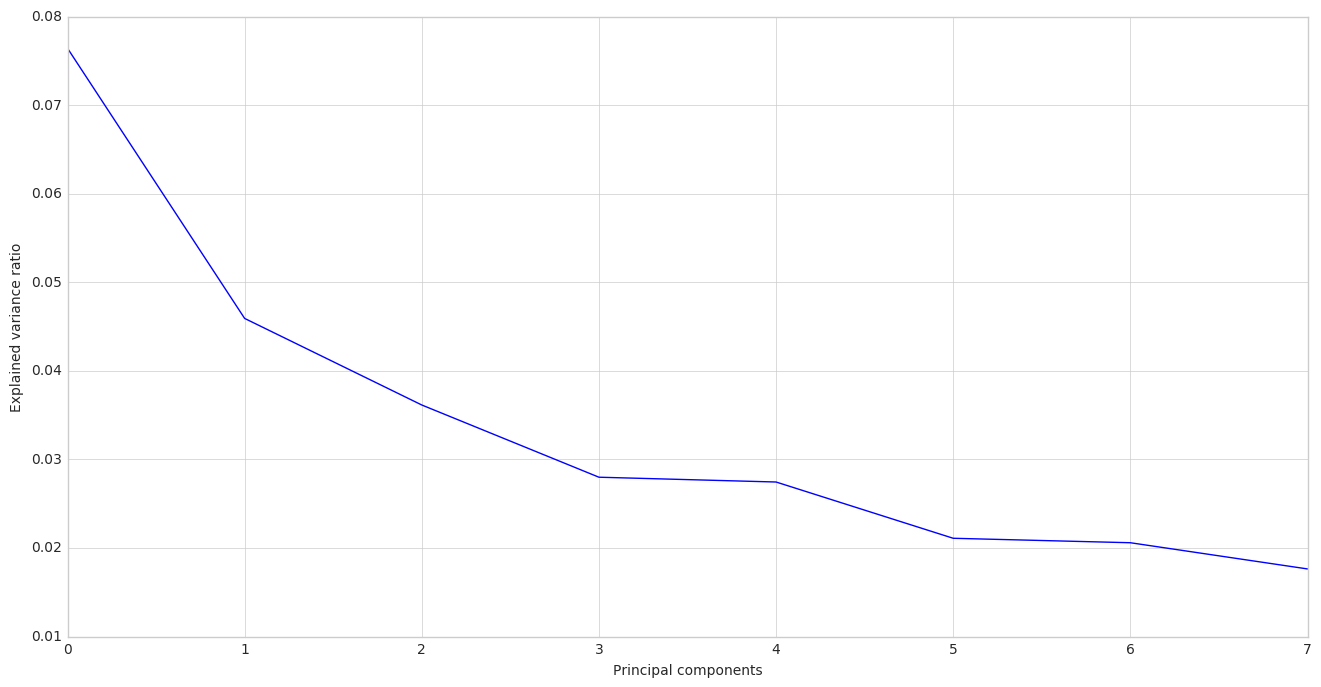

In [16]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 8));
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.plot(pca1.explained_variance_ratio_);

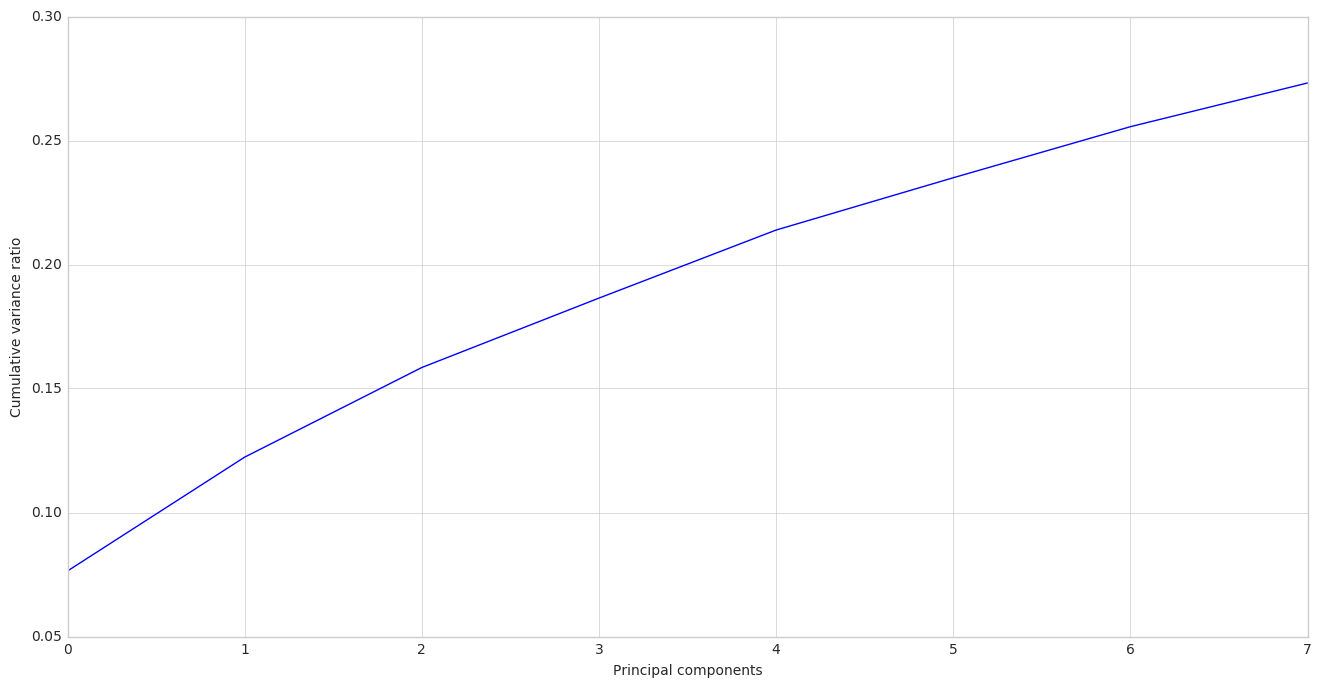

In [17]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 8));
    plt.ylabel('Cumulative variance ratio')
    plt.xlabel('Principal components')
    plt.plot(pca1.explained_variance_ratio_.cumsum());

## Plotting the Data (DM_heart2)

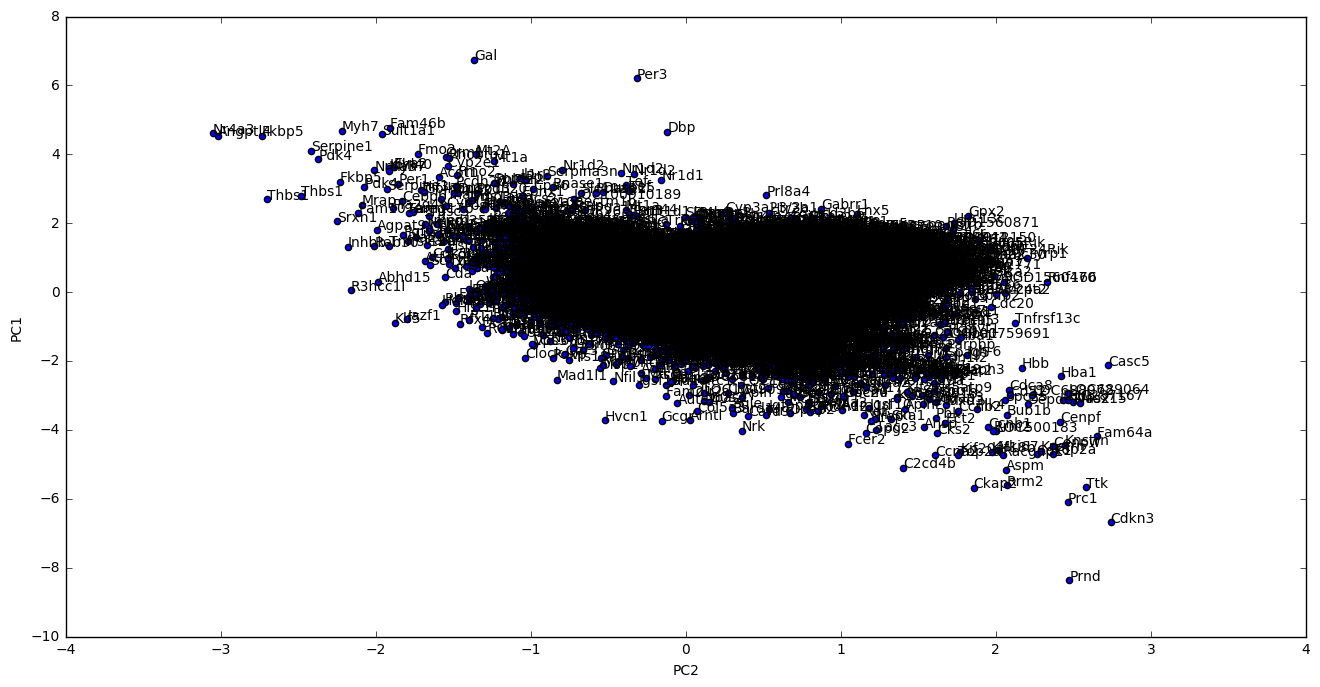

In [18]:
%matplotlib inline

ax = DM_heart2_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, Drug in enumerate(DM_heart2.index):
    ax.annotate(Drug, (DM_heart2_2d.iloc[i].PC2, DM_heart2_2d.iloc[i].PC1))

In [19]:
DM_heart2_2d['Drug_mean'] = pd.Series(DM_heart2.mean(axis=1), index=DM_heart2_2d.index)
Drug_mean_max = DM_heart2_2d['Drug_mean'].max()
Drug_mean_min = DM_heart2_2d['Drug_mean'].min()
Drug_mean_scaled = (DM_heart2_2d.Drug_mean-Drug_mean_min) / Drug_mean_max
DM_heart2_2d['Drug_mean_scaled'] = pd.Series(
    Drug_mean_scaled, 
    index=DM_heart2_2d.index)
DM_heart2_2d.head()

,PC1,PC2,Drug_mean,Drug_mean_scaled
Gene,,,,
Cyp1a1,2.490833,-1.546235,0.083587,1.080141
Amy2a3,1.258695,0.626813,0.070356,1.053143
Gtpbp6,-0.097533,-0.571419,-0.011207,0.886710
Btrc,0.041549,-0.011056,-0.000442,0.908675
Pde12,-0.059605,0.369462,-0.003755,0.901916


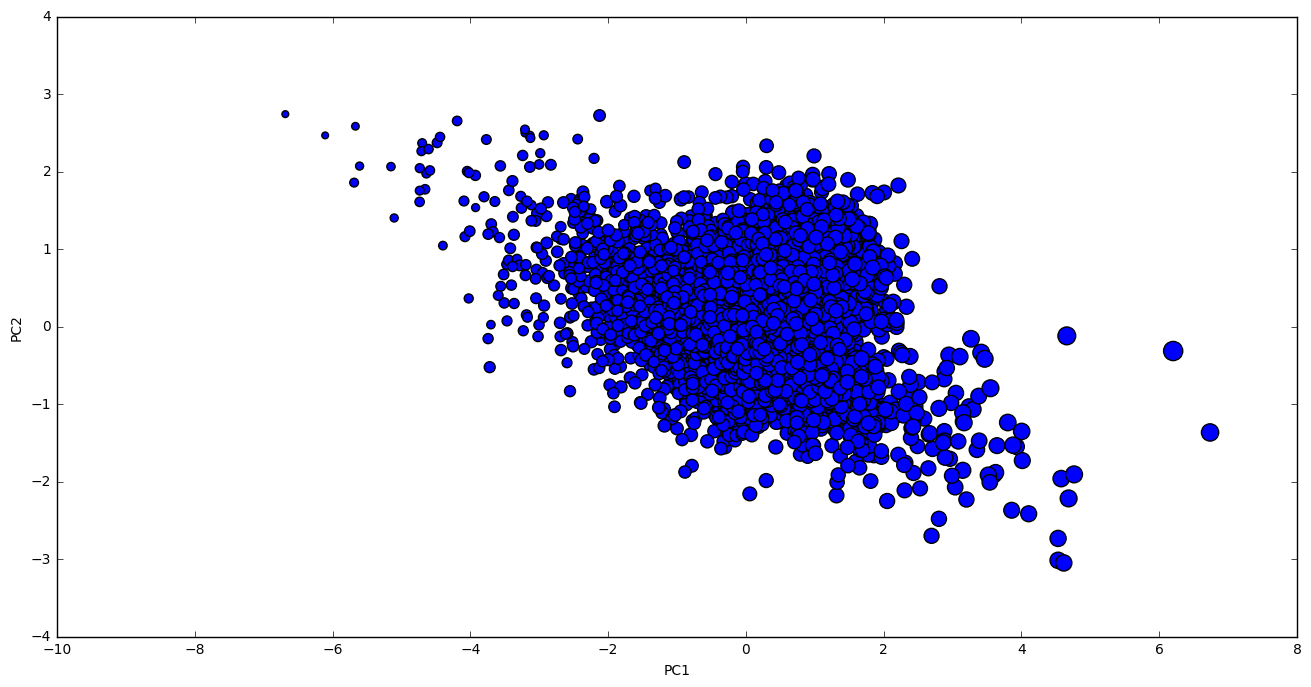

In [20]:
DM_heart2_2d.plot(kind='scatter', x='PC1', y='PC2', s=DM_heart2_2d['Drug_mean_scaled']*100, figsize=(16,8))

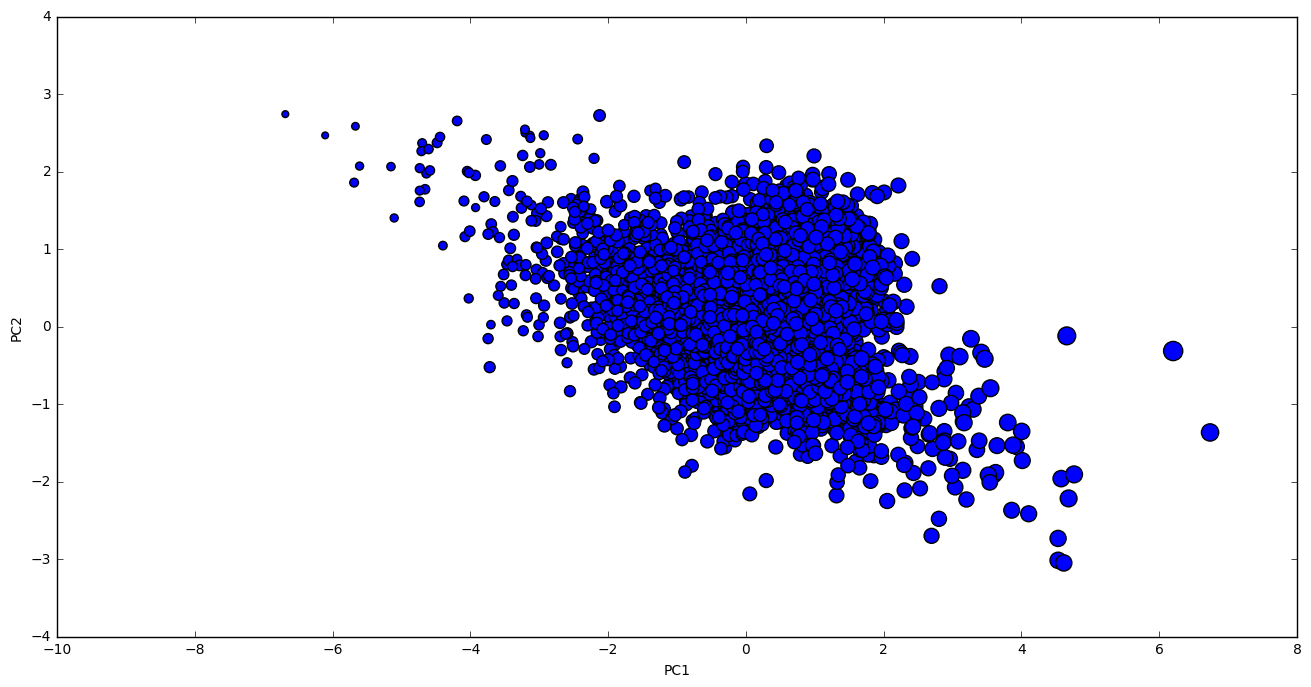

In [21]:
DM_heart2_2d['Drug_sum'] = pd.Series(DM_heart2.sum(axis=1), index=DM_heart2_2d.index)
Drug_sum_max = DM_heart2_2d['Drug_sum'].max()
Drug_sum_min = DM_heart2_2d['Drug_sum'].min()
Drug_sum_scaled = (DM_heart2_2d.Drug_sum-Drug_sum_min) / Drug_sum_max
DM_heart2_2d['Drug_sum_scaled'] = pd.Series(
    Drug_sum_scaled, 
    index=DM_heart2_2d.index)
DM_heart2_2d.head()
DM_heart2_2d.plot(kind='scatter', x='PC1', y='PC2', s=DM_heart2_2d['Drug_sum_scaled']*100, figsize=(16,8))

In [22]:
pca2 = PCA(n_components=4)
pca2.fit(DM_heart2)
print(pca2.explained_variance_ratio_)

[ 0.08693421  0.04967538  0.03634903  0.03047634]


In [23]:
pca2 = PCA(n_components=8)
pca2.fit(DM_heart2)
print(pca2.explained_variance_ratio_)

[ 0.08693421  0.04967538  0.03634903  0.03047634  0.0267991   0.02158841
  0.02102155  0.01803003]


### Though the plots look similar, the explained variance ration slightly increased with ~7,000 less genes that were not annotated in DrugMatrix's database.

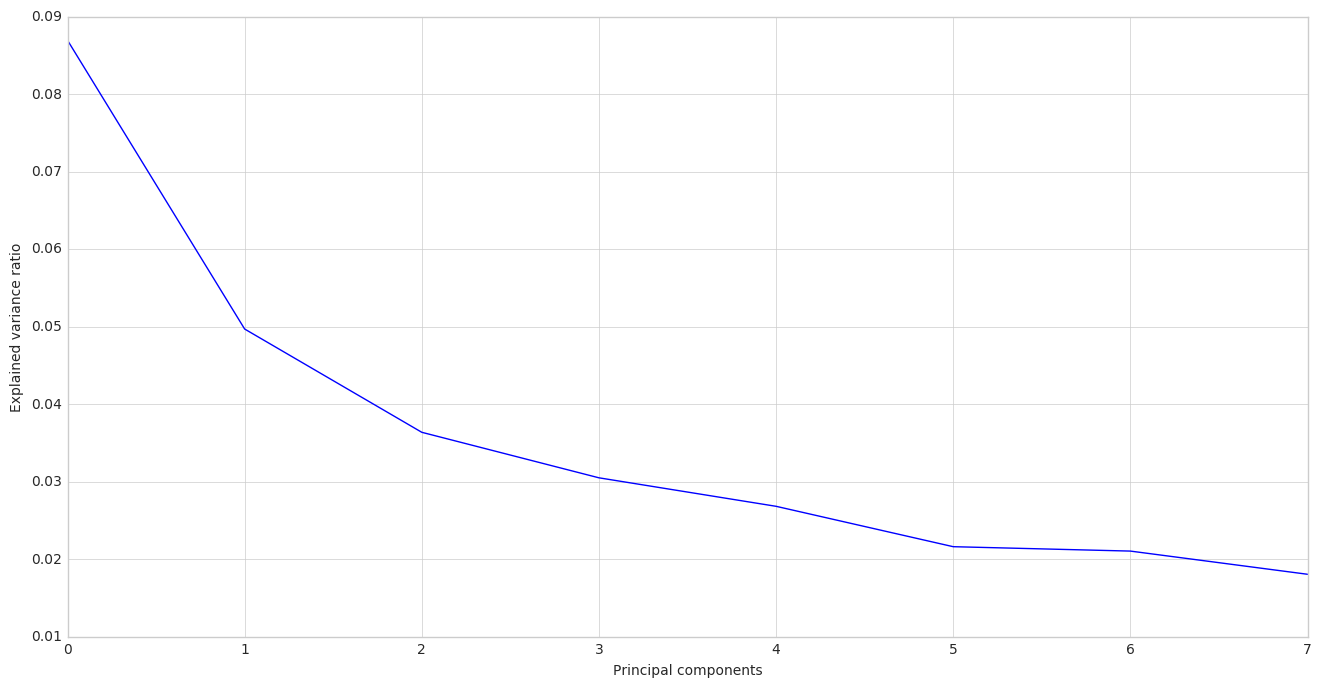

In [24]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 8));
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.plot(pca2.explained_variance_ratio_);

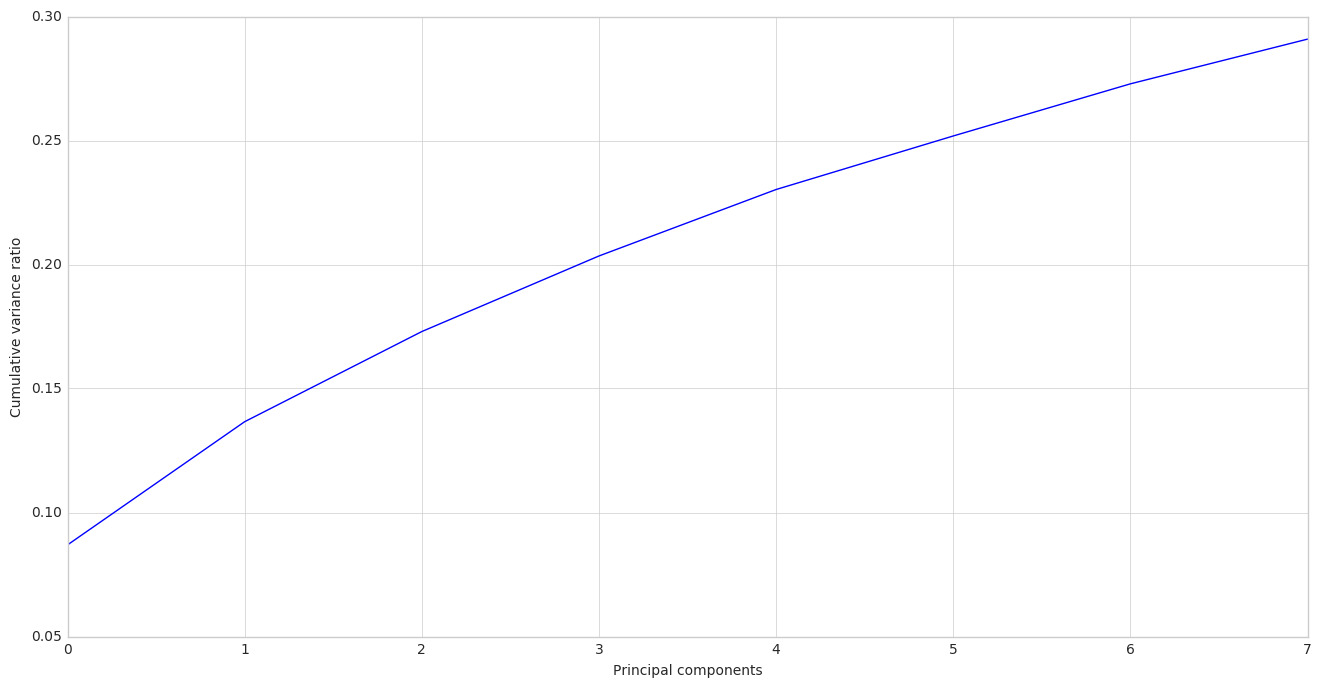

In [25]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 8));
    plt.ylabel('Cumulative variance ratio')
    plt.xlabel('Principal components')
    plt.plot(pca2.explained_variance_ratio_.cumsum());